In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
main_df = pd.read_csv('../data/World Energy Consumption.csv')
main_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [14]:
countries = ['New Zealand', 'Canada', 'Australia', 'United Kingdom', 'United States']
filtered_df = main_df[main_df['country'].isin(countries)]
filtered_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1512,Australia,1900,AUS,3693331.0,2.393118e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1513,Australia,1901,AUS,3755013.0,2.322160e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,Australia,1902,AUS,3815541.0,2.346190e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,Australia,1903,AUS,3874858.0,2.531231e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,Australia,1904,AUS,3935097.0,2.701432e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20706,United States,2018,USA,332140032.0,1.814065e+13,-1.325,-5.433,1218.223,404.621,186.156,...,2.222,0.932,7.222,45.081,728.691,820.949,272.67,2193.926,6.490,2.723
20707,United States,2019,USA,334319680.0,NaN,2.780,11.250,1243.930,415.870,172.021,...,2.570,1.071,8.514,59.126,787.816,885.021,295.88,2356.476,7.115,2.965
20708,United States,2020,USA,335942016.0,NaN,-9.029,-37.549,1126.150,378.321,162.826,...,3.233,1.409,14.214,108.672,896.488,1005.947,337.94,2668.579,8.358,3.644
20709,United States,2021,USA,336997632.0,NaN,9.917,37.518,1233.954,415.839,160.980,...,3.958,1.675,11.913,103.127,999.615,1122.263,378.20,2966.237,9.105,3.853


In [15]:
columns_needed = ['country', 'year', 'primary_energy_consumption', 'renewables_consumption']
data_selected = filtered_df[columns_needed]

# Check for missing values in the selected columns
data_selected.isnull().sum()

country                         0
year                            0
primary_energy_consumption    325
renewables_consumption        325
dtype: int64

In [16]:
# Drop rows with missing values
data_selected = data_selected.dropna()
data_selected.isnull().sum()

country                       0
year                          0
primary_energy_consumption    0
renewables_consumption        0
dtype: int64

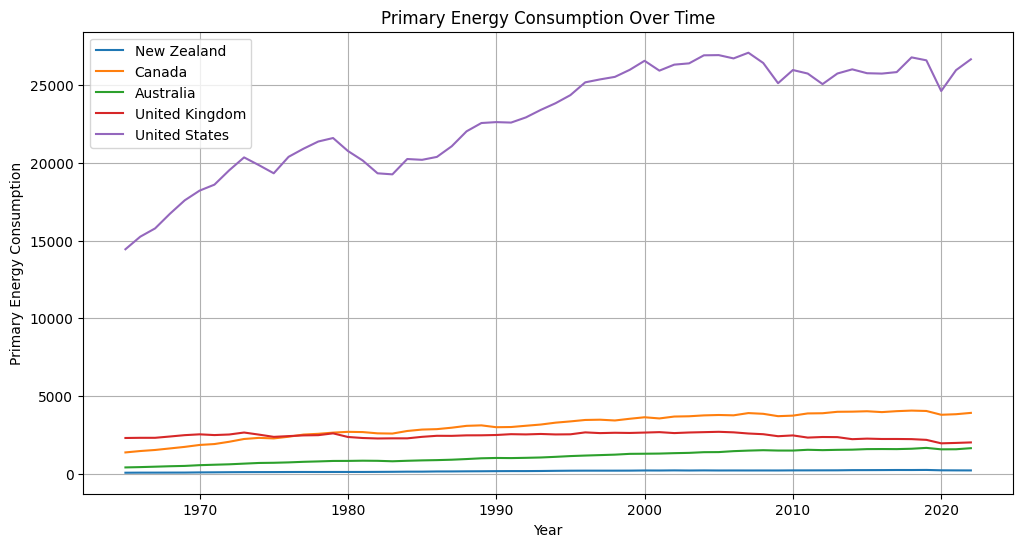

In [17]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = data_selected[data_selected['country'] == country]
    plt.plot(country_data['year'], country_data['primary_energy_consumption'], label=country)

plt.title('Primary Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

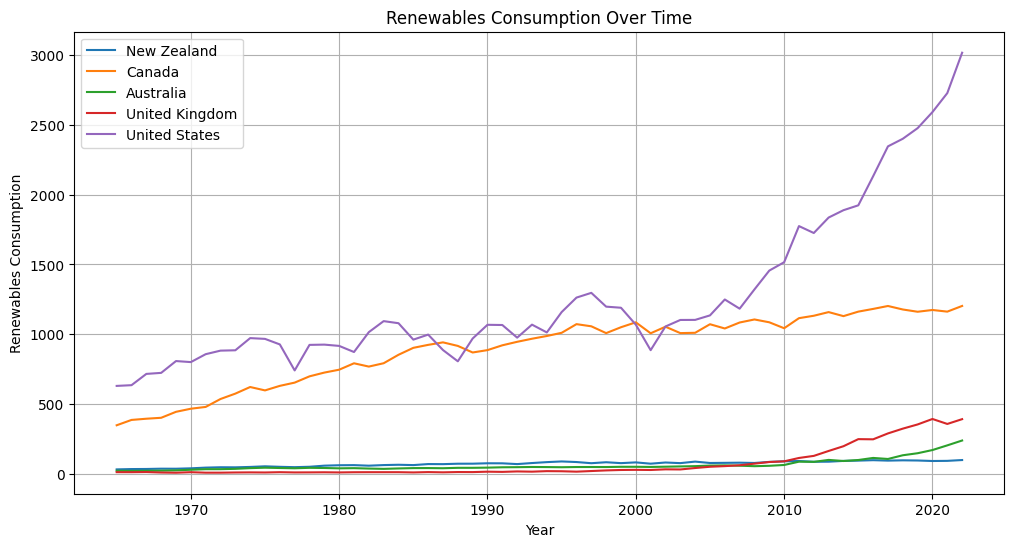

In [18]:
plt.figure(figsize=(12, 6))
for country in countries:
    subset = data_selected[data_selected['country'] == country]
    plt.plot(subset['year'], subset['renewables_consumption'], label=country)

plt.title('Renewables Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Renewables Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Forcasting the next 5 years
def forecast_energy_consumption(country, target_column, years_to_forecast=6):
    country_data = data_selected[data_selected['country'] == country]
    country_data = country_data.set_index('year')
    serise = country_data[target_column]

    modal = SARIMAX(serise, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    modal_fit = modal.fit(disp=False)

    forecast = modal_fit.forecast(steps=years_to_forecast)
    forecast_years  = np.arange(country_data.index[-1] + 1, country_data.index[-1] + years_to_forecast + 1)

    plt.figure(figsize=(12, 6))
    plt.plot(serise.index, serise.values, label='Actual Data')
    plt.plot(forecast_years, forecast.values, label='Forecast', color='red')
    plt.title(f'{country} {target_column} Forecast')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

    return forecast

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespac

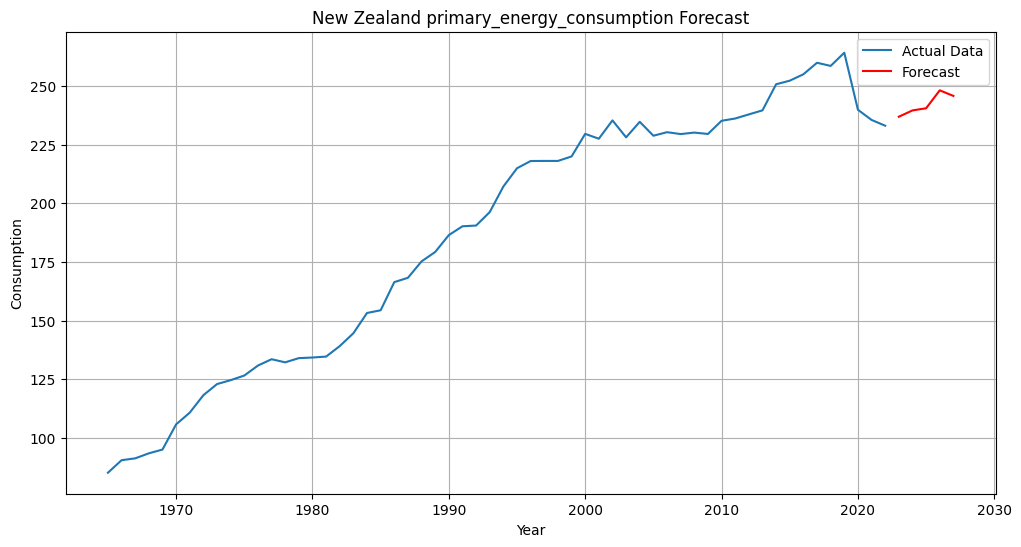

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\ts

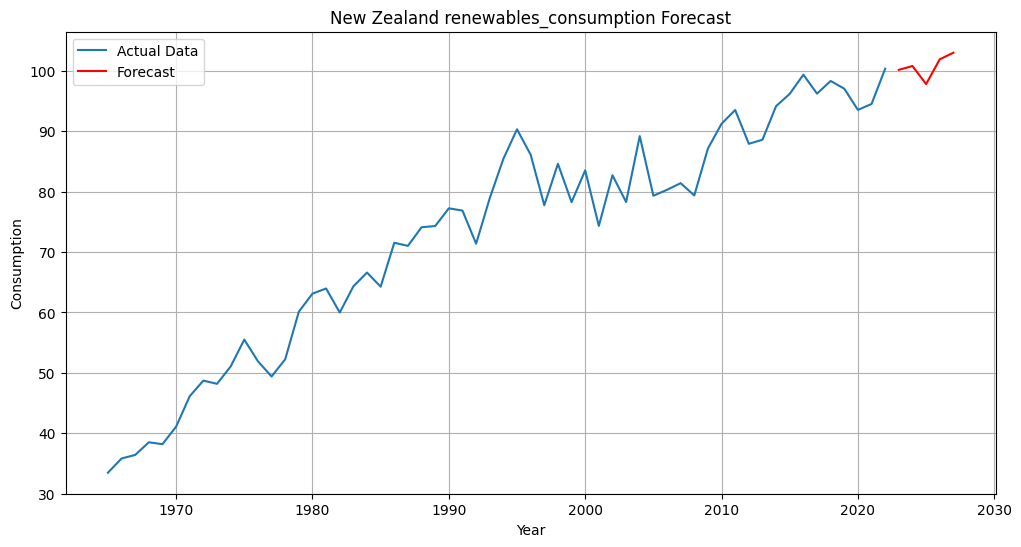

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa

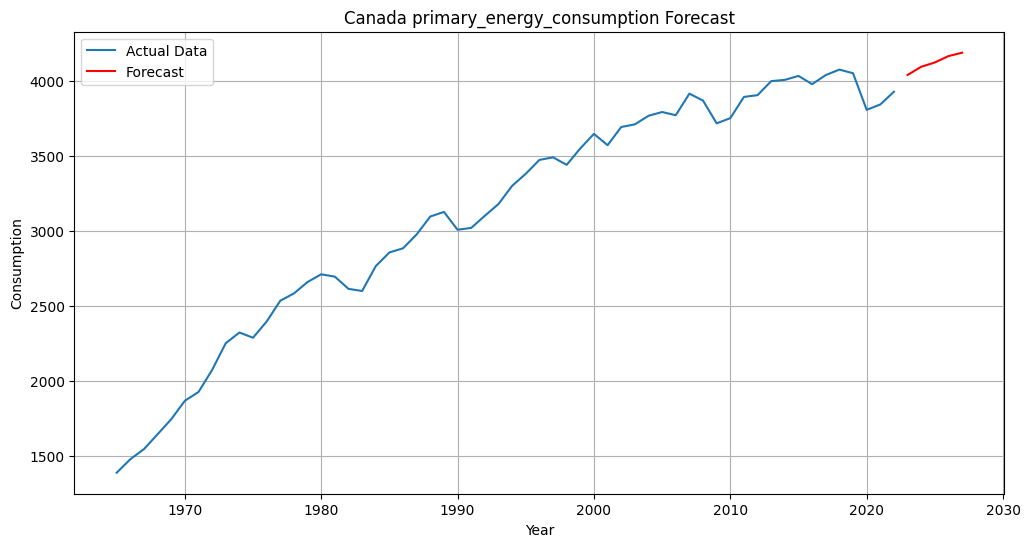

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa

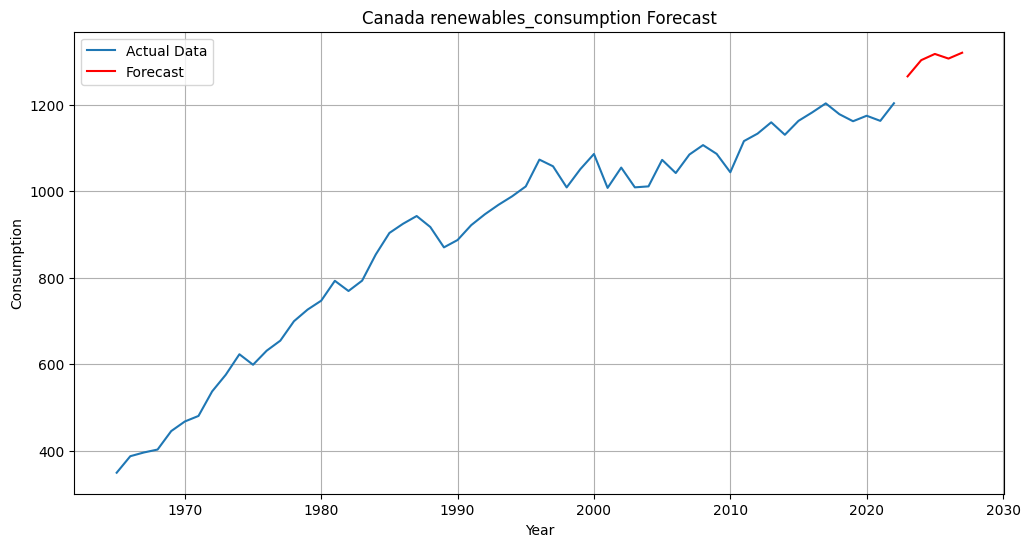

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa

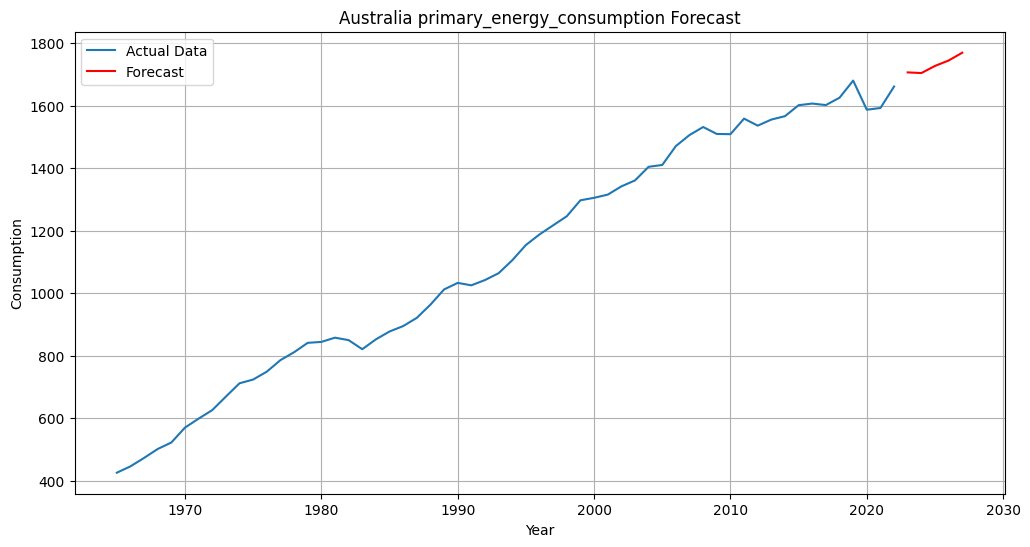

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\ts

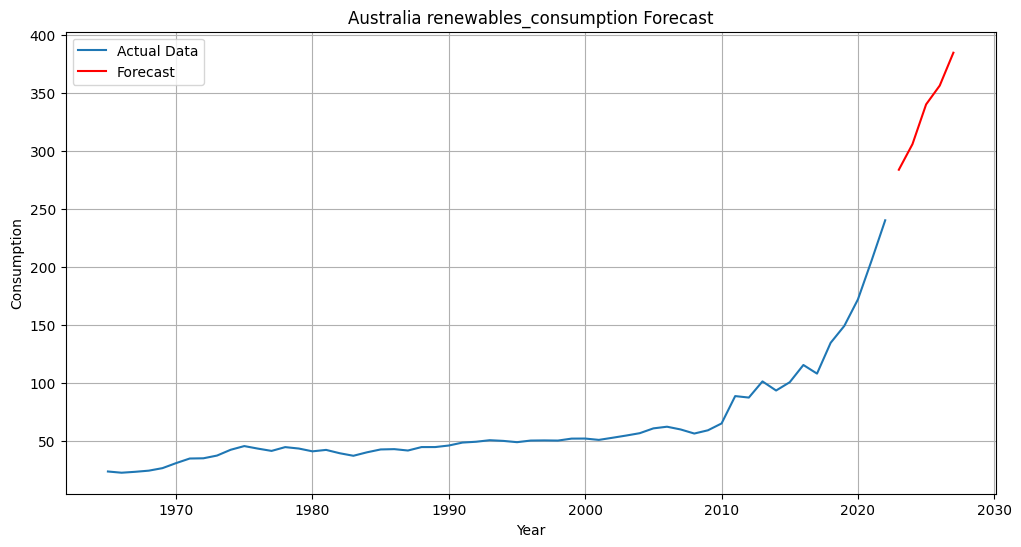

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa

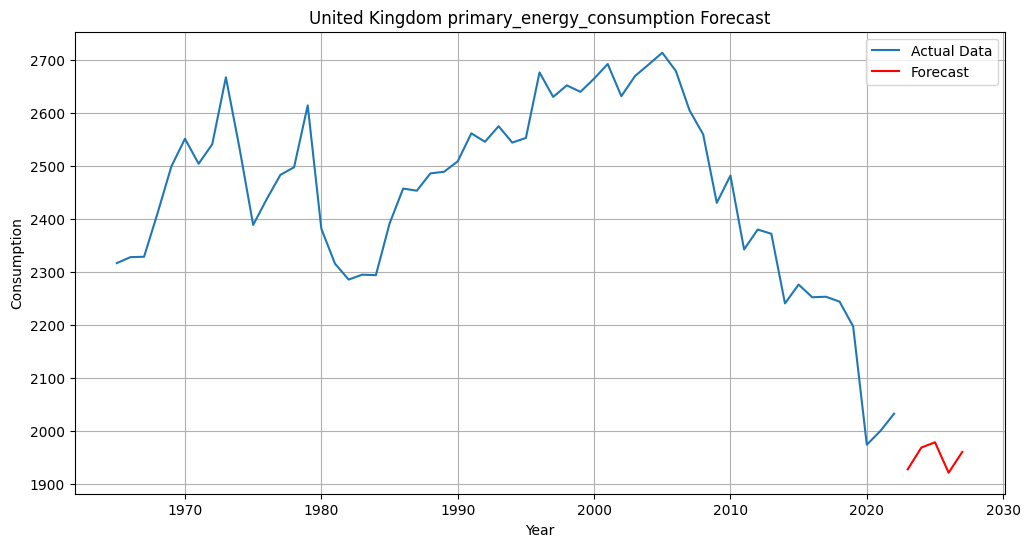

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespac

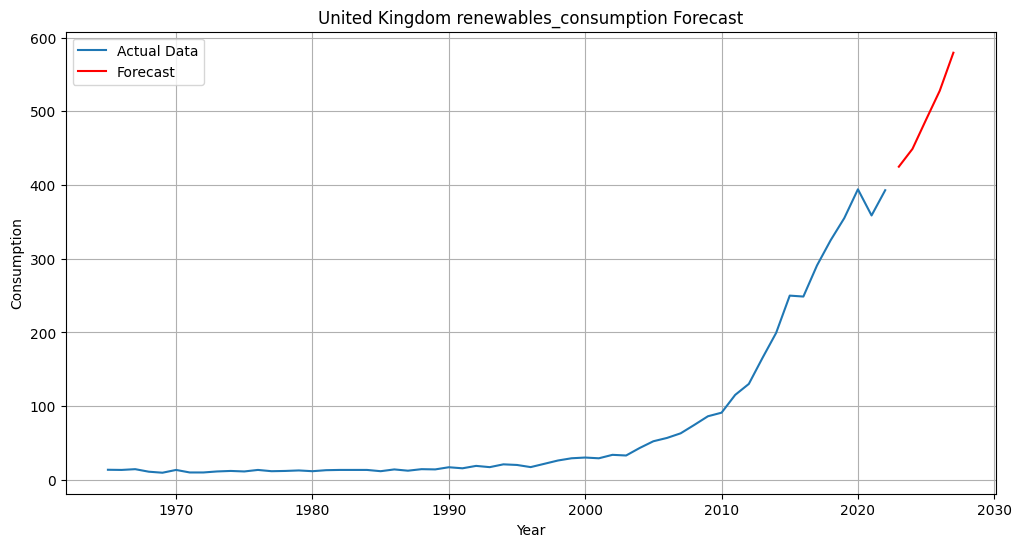

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.p

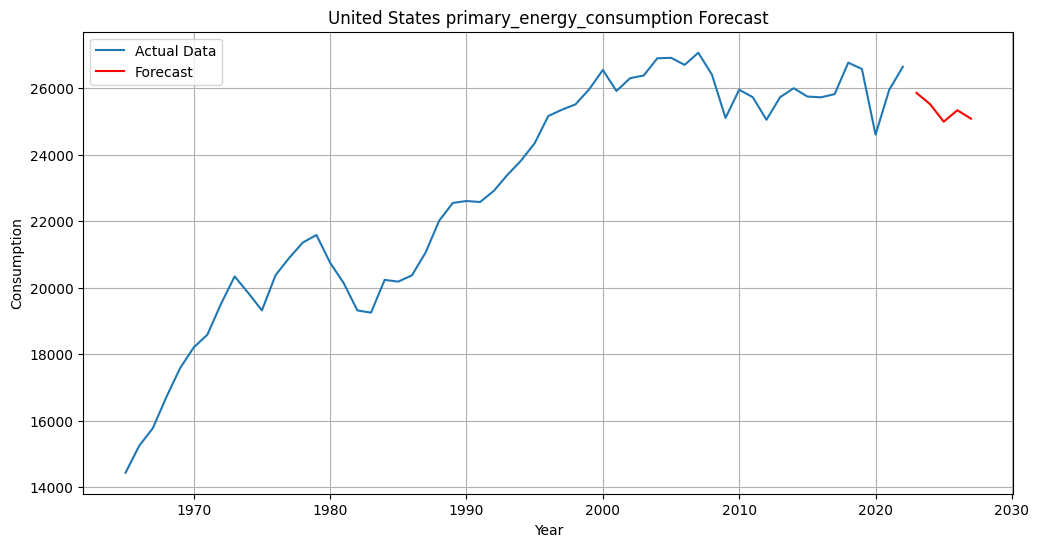

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.p

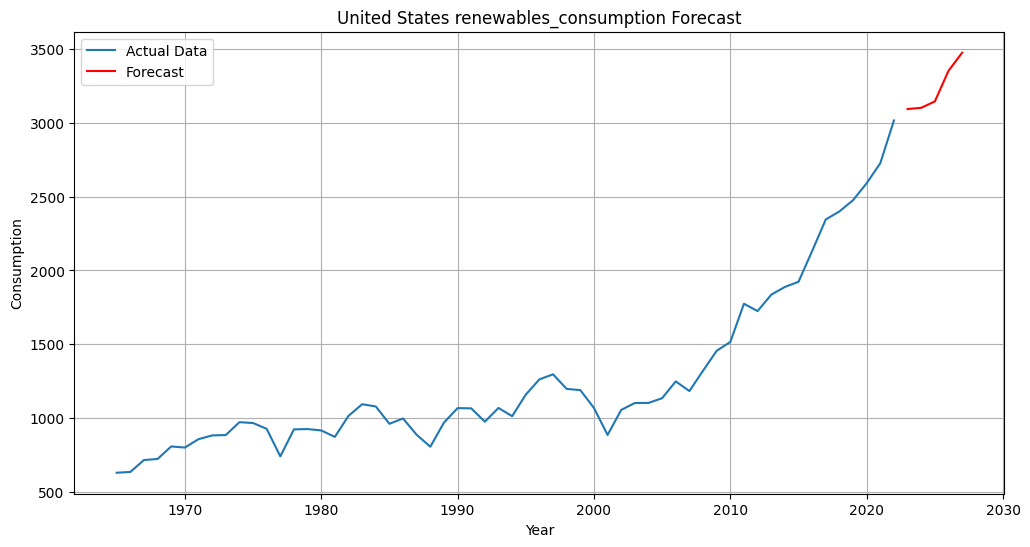

In [20]:
forecast_results = {}
for country in countries:
    forecast_total = forecast_energy_consumption(country, 'primary_energy_consumption', years_to_forecast=5)
    forecast_renewable = forecast_energy_consumption(country, 'renewables_consumption', years_to_forecast=5)

    forecast_results[country] = {
        'total_energy_forecast': forecast_total,
        'renewable_energy_forecast': forecast_renewable
    }

In [21]:
forecast_results

{'New Zealand': {'total_energy_forecast': 58    236.862015
  59    239.540346
  60    240.458519
  61    248.090100
  62    245.715147
  Name: predicted_mean, dtype: float64,
  'renewable_energy_forecast': 58    100.166388
  59    100.799500
  60     97.808208
  61    101.905192
  62    102.999875
  Name: predicted_mean, dtype: float64},
 'Canada': {'total_energy_forecast': 58    4040.424610
  59    4094.827920
  60    4123.637882
  61    4166.098903
  62    4188.513048
  Name: predicted_mean, dtype: float64,
  'renewable_energy_forecast': 58    1265.106365
  59    1302.609954
  60    1316.945902
  61    1306.245070
  62    1319.767360
  Name: predicted_mean, dtype: float64},
 'Australia': {'total_energy_forecast': 58    1706.473592
  59    1704.385641
  60    1727.130521
  61    1744.529431
  62    1769.429252
  Name: predicted_mean, dtype: float64,
  'renewable_energy_forecast': 58    283.677962
  59    305.729270
  60    339.974733
  61    356.198677
  62    384.499408
  Name: predi

In [22]:
summary = []
for country in countries:
    total_forecast = forecast_results[country]['total_energy_forecast']
    renewables_forecast = forecast_results[country]['renewable_energy_forecast']
    summary.append({
        'Country': country,
        '2030 Total Energy (TWh)': total_forecast.iloc[-1],
        '2030 Renewables (TWh)': renewables_forecast.iloc[-1],
        'Renewables Share (%)': (renewables_forecast.iloc[-1] / total_forecast.iloc[-1]) * 100
    })

summary_df = pd.DataFrame(summary)
print("\nProjected Energy Consumption in 2030:")
print(summary_df)


Projected Energy Consumption in 2030:
          Country  2030 Total Energy (TWh)  2030 Renewables (TWh)  \
0     New Zealand               245.715147             102.999875   
1          Canada              4188.513048            1319.767360   
2       Australia              1769.429252             384.499408   
3  United Kingdom              1959.681823             579.464066   
4   United States             25081.627530            3473.350977   

   Renewables Share (%)  
0             41.918407  
1             31.509210  
2             21.730137  
3             29.569293  
4             13.848188  
